In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
dreams = pd.read_csv("dreams.csv", index_col=0)

In [25]:
dreams["month"] = dreams.date.astype("datetime64[M]")

In [26]:
content_filter = (dreams["content"] != "no memory") & (dreams["content"] != "weak memory")

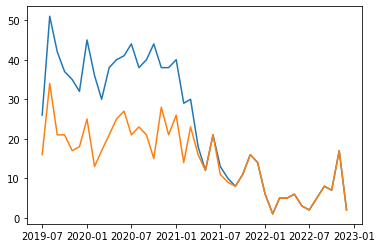

In [27]:
plt.plot(dreams.groupby("month").count()["date"])
plt.plot(dreams[content_filter].groupby("month").count()["date"])

In [28]:
dreams.shape[0]

979

In [29]:
dreams[content_filter].shape[0]

627

In [53]:
from ast import literal_eval
dreams.people = dreams.people.apply(literal_eval)
dreams.female = dreams.female.apply(literal_eval)

In [99]:
gender = dreams.explode("female").groupby("female").count()["date"]
#gender["nan"] = dreams.explode("female")["female"].isna().sum()
gender = gender.rename({False: "male", True: "female"}, axis=1)
gender

female
male      142
female    139
Name: date, dtype: int64

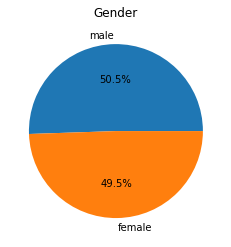

In [114]:
fig, ax = plt.subplots()
ax.pie(gender, labels=gender.index, autopct='%1.1f%%')
ax.set_title("Gender");